In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

In [4]:
from data_load import *
import Exp7

In [5]:
class Stuff: pass

def one_dot_one_scat(method):
    '''Return performance statistics of the method, from the point of view of one class'''
    #Results per supercategory
    stats = pd.DataFrame(columns=['TP', 'TN', 'FP', 'FN', 'Precision', 'Recall'], index=sorted(all_supercategories))
    perf = {}
    scat2yciks = Exp7.results[method+'/scat2yciks']
    for scat in [sc for sc in all_supercategories if len(supercategory2years_ciks[sc])>0]:
        res = Stuff()
        res.pos = supercategory2years_ciks[scat]  # All ground truth positives
        res.tp = scat2yciks[scat] & supercategory2years_ciks[scat]  # True positives
        res.fp = scat2yciks[scat] - supercategory2years_ciks[scat]  # False positives
        res.neg = all_yciks - supercategory2years_ciks[scat]  # All ground truth negatives
        res.tn = (all_yciks - supercategory2years_ciks[scat]) & (all_yciks - scat2yciks[scat])  # True negatives
        res.fn = supercategory2years_ciks[scat] - scat2yciks[scat]  # False negatives
        assert res.pos == res.tp | res.fn
        #print(res.neg, res.tn, res.fp)
        assert res.neg == res.tn | res.fp
        assert scat2yciks[scat] == res.tp | res.fp
        assert all_yciks - scat2yciks[scat] == res.tn | res.fn
        perf[scat] = res
        if len(res.tp) > 0:
            stats.loc[scat,:] = list(map(len,[res.tp, res.tn, res.fp, res.fn])) + [len(res.tp)/(len(res.tp)+len(res.fp)), 
                                                                        len(res.tp)/(len(res.tp)+len(res.fn))]
        else:
            stats.loc[scat,:] = list(map(len,[res.tp, res.tn, res.fp, res.fn])) + [0,0]
    return perf, stats

In [6]:
Exp7.results.keys()

dict_keys(['all_must_match/ycik2scats', 'match_within_rank_100/scat2yciks', 'Most_matching/ycik2scats', 'match_within_rank_10/scat2yciks', 'match_within_rank_30/scat2yciks', 'match_within_rank_100/ycik2scats', '5_most_matching/ycik2scats', 'match_within_rank_1/scat2yciks', 'any_match/ycik2scats', 'match_within_rank_10/ycik2scats', 'match_within_rank_30/ycik2scats', 'Most_matching/scat2yciks', 'any_match/scat2yciks', '20_most_matching/ycik2scats', '2_most_matching/ycik2scats', 'match_within_rank_1/ycik2scats', '20_most_matching/scat2yciks', 'all_must_match/scat2yciks', '5_most_matching/scat2yciks', '2_most_matching/scat2yciks'])

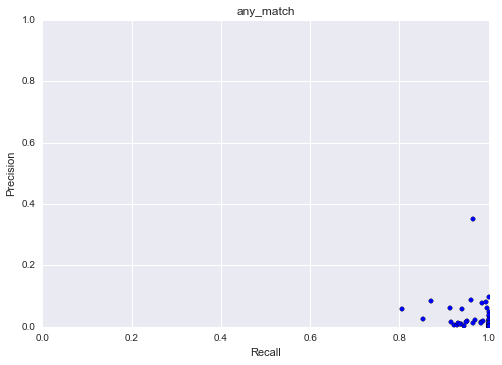

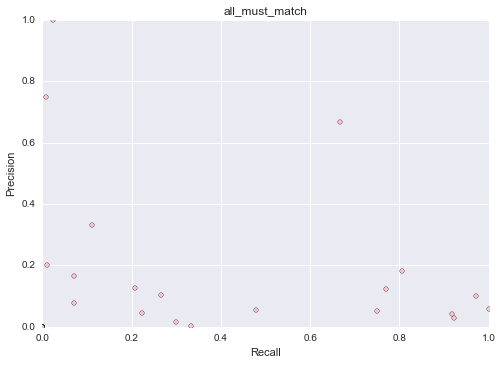

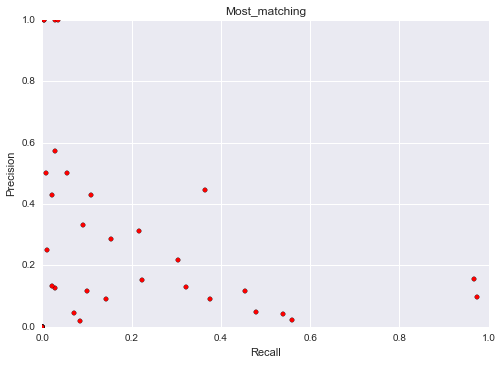

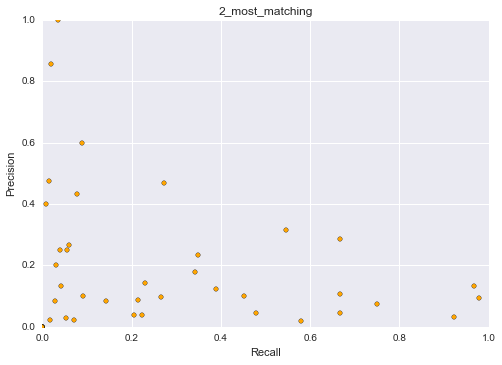

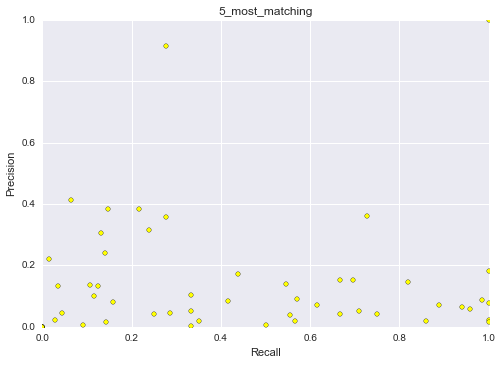

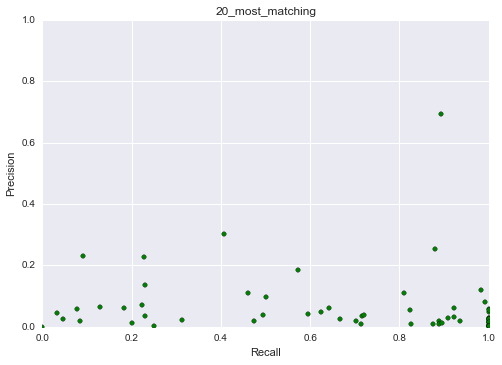

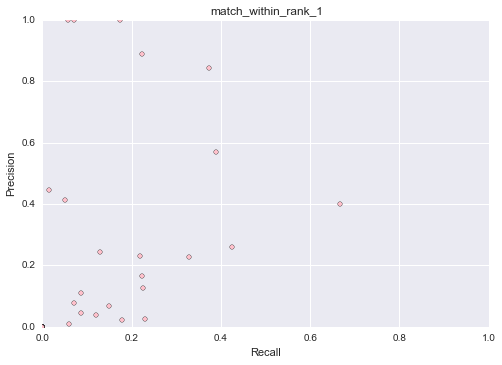

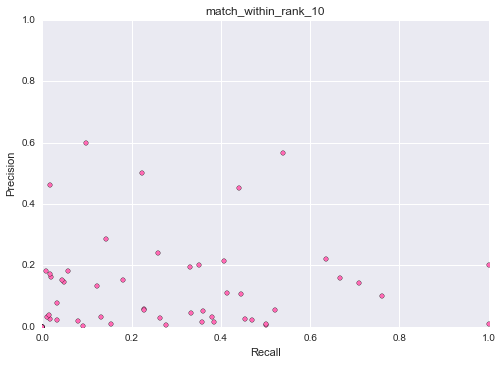

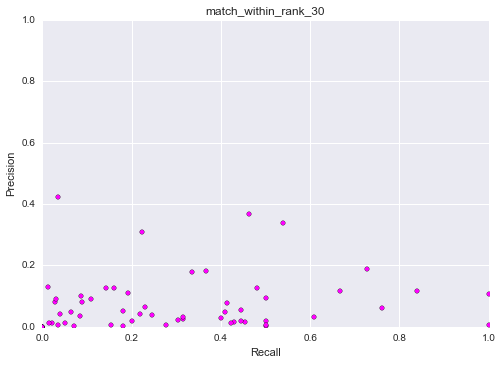

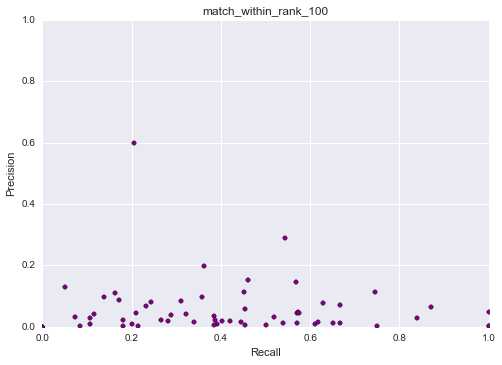

In [7]:
for method_str, color in zip(['any_match', 'all_must_match', 'Most_matching', '2_most_matching', '5_most_matching', 
                              '20_most_matching', 'match_within_rank_1', 'match_within_rank_10', 'match_within_rank_30',
                              'match_within_rank_100'],['blue', 'pink', 'red', 'orange', 'yellow', 'green', 'pink', 'hotpink',
                                                        'magenta', 'purple']):
    t = one_dot_one_scat(method_str)[1]
    plt.figure()
    plt.scatter(t['Recall'], t['Precision'], c=color)
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(method_str)

In [8]:
def one_dot_one_firm(method):
    '''Return performance statistics of the method, from the point of view of one firm'''
    #Results per supercategory
    stats = pd.DataFrame(columns=['TP', 'TN', 'FP', 'FN', 'Precision', 'Recall'], index=sorted(all_yciks, key=lambda ycik:ycik[1]))
    perf = {}
    ycik2scats = Exp7.results[method+'/ycik2scats']
    for ycik in [yc for yc in all_yciks if len(year_cik2supercategories[yc])>0]:
        res = Stuff()
        res.pos = year_cik2supercategories[ycik]  # All ground truth positives
        res.tp = ycik2scats[ycik] & year_cik2supercategories[ycik]  # True positives
        res.fp = ycik2scats[ycik] - year_cik2supercategories[ycik]  # False positives
        res.neg = all_supercategories - year_cik2supercategories[ycik]  # All ground truth negatives
        res.tn = (all_supercategories - year_cik2supercategories[ycik]) & (all_supercategories - ycik2scats[ycik])  # True negatives
        res.fn = year_cik2supercategories[ycik] - ycik2scats[ycik]  # False negatives
        assert res.pos == res.tp | res.fn
        #print(res.neg, res.tn, res.fp)
        assert res.neg == res.tn | res.fp
        assert ycik2scats[ycik] == res.tp | res.fp
        assert all_supercategories - ycik2scats[ycik] == res.tn | res.fn
        perf[ycik] = res
        if len(res.tp) > 0:
            stats.loc[ycik,:] = list(map(len,[res.tp, res.tn, res.fp, res.fn])) + [len(res.tp)/(len(res.tp)+len(res.fp)), 
                                                                        len(res.tp)/(len(res.tp)+len(res.fn))]
        else:
            stats.loc[ycik,:] = list(map(len,[res.tp, res.tn, res.fp, res.fn])) + [0,0]
    return perf, stats

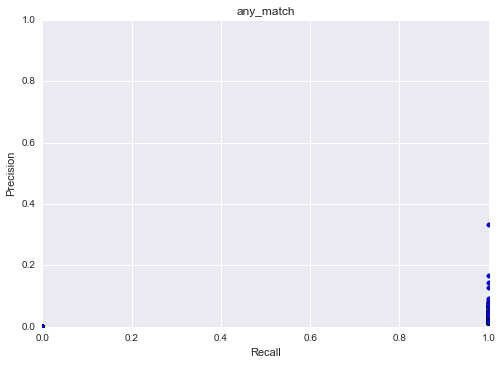

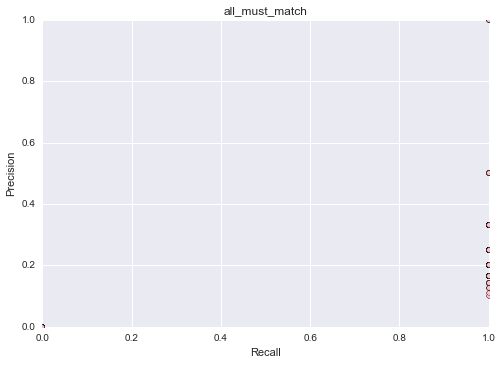

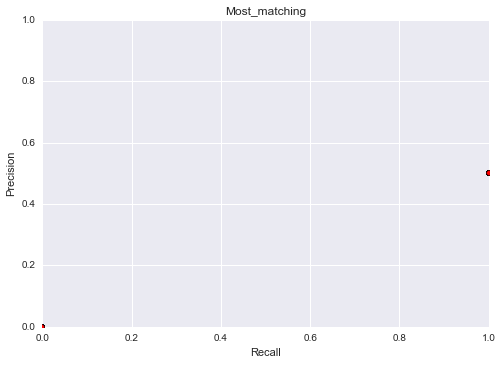

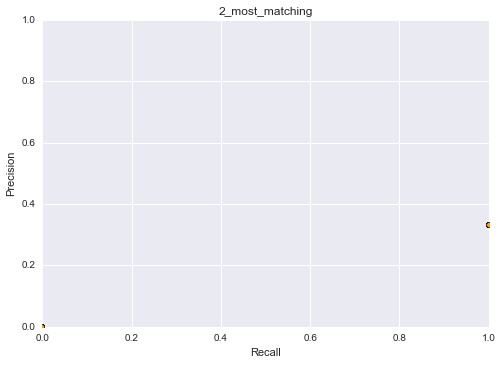

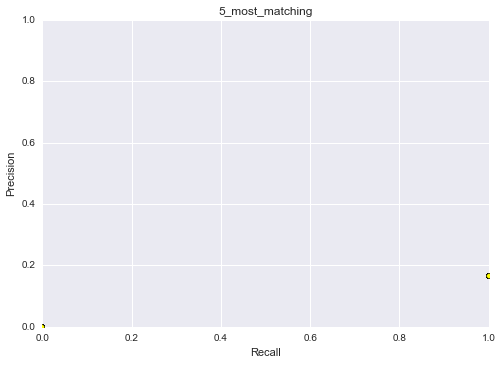

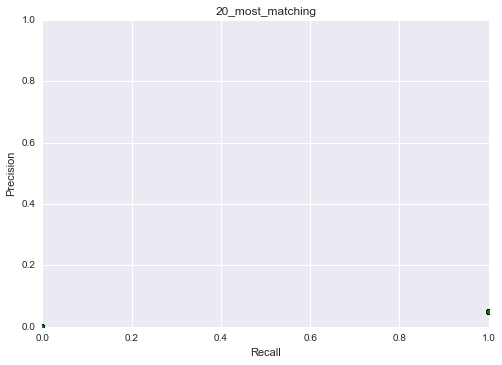

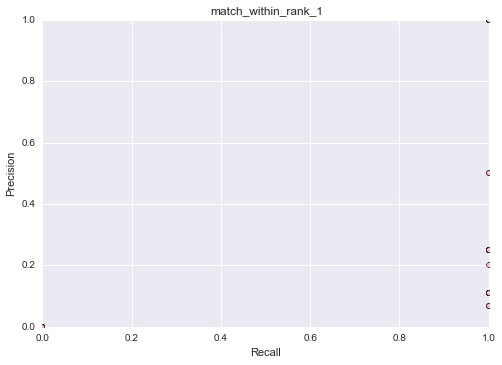

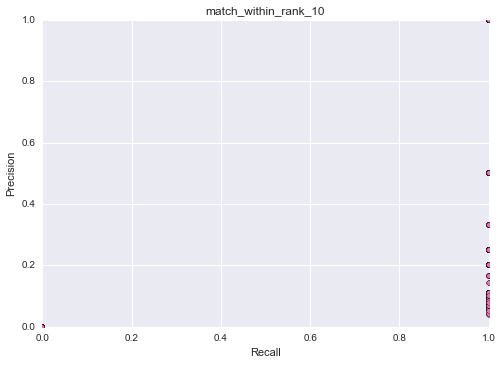

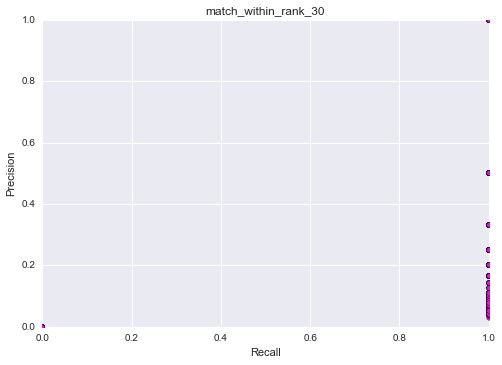

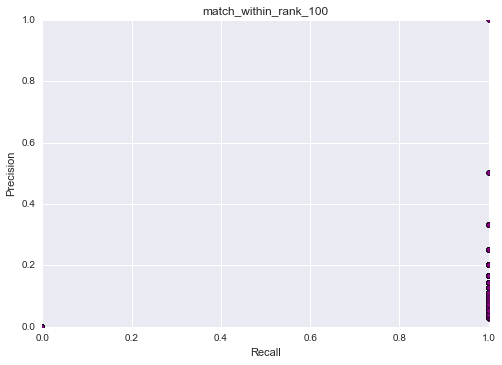

In [9]:
for method_str, color in zip(['any_match', 'all_must_match', 'Most_matching', '2_most_matching', '5_most_matching', 
                              '20_most_matching', 'match_within_rank_1', 'match_within_rank_10', 'match_within_rank_30',
                              'match_within_rank_100'],['blue', 'pink', 'red', 'orange', 'yellow', 'green', 'pink', 'hotpink',
                                                        'magenta', 'purple']):
    t = one_dot_one_firm(method_str)[1]
    plt.figure()
    plt.scatter(t['Recall'], t['Precision'], c=color)
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(method_str)